# [Tarea 05] Ejercicios Unidad 02 B Método de Newton y de la Secante
#### Kevin Alexander Gómez Moreno
#### 18 de mayo de 2025
#### GitHub: git clone https://github.com/Zoxior/Metodos-Numericos-Tareas.git

### CONJUNTO DE EJERCICIOS 


## Ejercicio 1
Sea $f(x) = -x^3 - \cos x$ y $p_0 = -1$.
Use el método de Newton y de la Secante para encontrar $p_2$.
 ¿Se podría usar $p_0 = 0$?



In [19]:
import numpy as np
# Definir la función f(x) y su derivada f'(x)
def f(x):
    return -x**3 - np.cos(x)
def df(x):
    return -3*x**2 + np.sin(x)
# Método de Newton
def metodo_newton(p0, tol=1e-5, max_iter=100):
    """
    Implementación del método de Newton para encontrar raíces.
    """
    p = p0
    iteraciones = 0
    llamados_a_f = 0
    for _ in range(max_iter):
        f_p = f(p)
        df_p = df(p)
        llamados_a_f += 2  # Llamada a f(x) y f'(x)
        # Verificar si la derivada es cero para evitar división por cero
        if df_p == 0:
            raise ValueError(f"Derivada nula en x = {p}. El método no puede continuar.")
        p_new = p - f_p / df_p
        iteraciones += 1
        # Verificar condición de parada
        if abs(p_new - p) < tol:
            return p_new, iteraciones, llamados_a_f
        p = p_new
    return p, iteraciones, llamados_a_f
# Método de la Secante
def metodo_secante(p0, p1, tol=1e-5, max_iter=100):
    """
    Implementación del método de la secante para encontrar raíces.
    """
    iteraciones = 0
    llamados_a_f = 0
    for _ in range(max_iter):
        f_p0 = f(p0)
        f_p1 = f(p1)
        llamados_a_f += 2  # Llamadas a f(x) para p0 y p1
        # Verificar si el denominador es cero para evitar división por cero
        if f_p1 - f_p0 == 0:
            raise ValueError(f"Diferencia nula en f(p0) y f(p1). El método no puede continuar.")
        p_new = p1 - f_p1 * (p1 - p0) / (f_p1 - f_p0)
        iteraciones += 1 
        # Verificar condición de parada
        if abs(p_new - p1) < tol:
            return p_new, iteraciones, llamados_a_f
        p0, p1 = p1, p_new
    return p1, iteraciones, llamados_a_f
# Inicialización
p0_newton = -1
p0_secante = -1
p1_secante = 0
# Aplicar los métodos y manejar errores potenciales
try:
    raiz_newton, iter_newton, llamados_newton = metodo_newton(p0_newton)
    print("Método de Newton:")
    print(f"Raíz aproximada: {raiz_newton}")
    print(f"Iteraciones: {iter_newton}")
    print(f"Llamadas a la función f(x): {llamados_newton}\n")
except Exception as e:
    print("Método de Newton falló:", e)
try:
    raiz_secante, iter_secante, llamados_secante = metodo_secante(p0_secante, p1_secante)
    print("Método de la Secante:")
    print(f"Raíz aproximada: {raiz_secante}")
    print(f"Iteraciones: {iter_secante}")
    print(f"Llamadas a la función f(x): {llamados_secante}\n")
except Exception as e:
    print("Método de la Secante falló:", e)
# Verificación si se puede usar p0 = 0 con el método de Newton
try:
    raiz_newton_zero, iter_zero, llamados_zero = metodo_newton(0)
    print("Método de Newton con p0 = 0:")
    print(f"Raíz aproximada: {raiz_newton_zero}")
    print(f"Iteraciones: {iter_zero}")
    print(f"Llamadas a la función f(x): {llamados_zero}")
except Exception as e:
    print("Método de Newton con p0 = 0 falló:", e)

Método de Newton:
Raíz aproximada: -0.8654740331016162
Iteraciones: 4
Llamadas a la función f(x): 8

Método de la Secante:
Raíz aproximada: -0.8654740331019471
Iteraciones: 8
Llamadas a la función f(x): 16

Método de Newton con p0 = 0 falló: Derivada nula en x = 0. El método no puede continuar.


## Ejercicio 2
Encuentre soluciones precisas dentro de $10^{-4}$ para los siguientes problemas:

a. $x^3 - 2x^2 - 5 = 0$, $[1,4]$  

In [20]:
def f(x):
    return x**3 - 2*x**2 - 5
def f_derivada(x):
    return 3*x**2 - 4*x
def metodo_de_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        derivada = f_derivada(x0)
        if derivada == 0:
            print("Error: La derivada es cero. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones

def main():
    x0 = (1 + 4) / 2  # Punto inicial
    tolerancia = 1e-4
    max_iteraciones = 100
    # Llamar al método de Newton
    solucion, iteraciones = metodo_de_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"El resultado de la ecuación x^3 - 2x^2 - 5 = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

El resultado de la ecuación x^3 - 2x^2 - 5 = 0 es: 2.69064744802861532946
Se alcanzó la solución en 4 iteraciones.


b. $x^3 + 3x^2 - 1 = 0$, $[-3, -2]$  


In [21]:
# Método Secante
def f(x):
    return x**3 + 3*x**2 - 1
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print("Error: El denominador es cero. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = -3  # Primer valor inicial
    x1 = 2   # Segundo valor inicial
    tolerancia = 1e-4
    max_iteraciones = 100
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"El resultado de la ecuación x^3 + 3x^2 - 1 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

El resultado de la ecuación x^3 + 3x^2 - 1 es: -2.87938523846004823525
Se alcanzó la solución en 6 iteraciones.


c. $x - \cos x = 0$, $[0, \pi/2]$  


In [22]:
from math import cos, sin, pi
def f(x):
    return x - cos(x)
def f_derivada(x):
    return 1 + sin(x)
def metodo_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        derivada = f_derivada(x0)
        if derivada == 0:
            print("Error: La derivada es cero. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones
def main():
    x0 = pi / 4  # Punto inicial dentro del intervalo [0, pi/2]
    tolerancia = 1e-4
    max_iteraciones = 100
    # Llamar al método de Newton
    solucion, iteraciones = metodo_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"El resultado de la ecuación x - cos(x) = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

El resultado de la ecuación x - cos(x) = 0 es: 0.73908513321516100536
Se alcanzó la solución en 3 iteraciones.


d. $x - 0.8 - 0.2 \sin x = 0$, $[0, \pi/2]$

In [23]:
from math import sin, pi
def f(x):
    return x - 0.8 - 0.2 * sin(x)
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print("Error: El denominador es cero. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = 0      # Primer valor inicial
    x1 = pi / 4 # Segundo valor inicial
    tolerancia = 1e-4
    max_iteraciones = 100
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"El resultado de la ecuación x - 0.8 - 0.2 * sin(x) = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

El resultado de la ecuación x - 0.8 - 0.2 * sin(x) = 0 es: 0.96433388769850869604
Se alcanzó la solución en 4 iteraciones.


## Ejercicio 3
Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{-5}$ para los siguentes problemas.

a. $3x - e^x = 0$ para $1 \leq x \leq 2$  
#### Metodo de Newton

In [24]:
from math import exp
def f(x):
    return 3*x - exp(x)
def f_derivada(x):
    return 3 - exp(x)
def metodo_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        derivada = f_derivada(x0)
        if derivada == 0:
            print("Error: La derivada es cero. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones
def main():
    x0 = 1.5  # Punto inicial dentro del intervalo [1, 2]
    tolerancia = 1e-5
    max_iteraciones = 100
    # Llamar al método de Newton
    solucion, iteraciones = metodo_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución para la ecuación 3x - e^x = 0 es {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución para la ecuación 3x - e^x = 0 es 1.51213455165785037870
Se alcanzó la solución en 3 iteraciones.


#### Metodo de la Secante

In [25]:
from math import exp
def f(x):
    return 3*x - exp(x)
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print("Error: El denominador es cero. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = 1.5  # Primer valor inicial
    x1 = 2    # Segundo valor inicial
    tolerancia = 1e-5
    max_iteraciones = 100
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución para la ecuación 3x - e^x = 0 es {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución para la ecuación 3x - e^x = 0 es 1.51213455165513654954
Se alcanzó la solución en 5 iteraciones.


b. $2x + 3 \cos x - e^x = 0$ para $1 \leq x \leq 2$
#### Metodo de Newton

In [26]:
from math import cos, sin, exp
def f(x):
    return 2*x + 3*cos(x) - exp(x)
def f_derivada(x):
    return 2 - 3*sin(x) - exp(x)
def metodo_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        derivada = f_derivada(x0)
        if derivada == 0:
            print("Error: La derivada es cero. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones
def main():
    x0 = 1.5  # Punto inicial dentro del intervalo [1, 2]
    tolerancia = 1e-5
    max_iteraciones = 100
    # Llamar al método de Newton
    solucion, iteraciones = metodo_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución de la ecuación 2x + 3 * cos(x) - e^x = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución de la ecuación 2x + 3 * cos(x) - e^x = 0 es: 1.23971469797522115819
Se alcanzó la solución en 4 iteraciones.


#### Metodo de la Secante

In [27]:
from math import cos, sin, exp
def f(x):
    return 2*x + 3*cos(x) - exp(x)
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print("Error: El denominador es cero. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = 1.5  # Primer valor inicial
    x1 = 2    # Segundo valor inicial
    tolerancia = 1e-5
    max_iteraciones = 100
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución de la ecuación 2x + 3 * cos(x) - e^x = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución de la ecuación 2x + 3 * cos(x) - e^x = 0 es: 1.23971470099049785318
Se alcanzó la solución en 5 iteraciones.



## Ejercicio 4
El polinomio de cuarto grado
$$ f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9 $$
tiene dos ceros reales, uno en $[-1,0]$ y el otro en $[0,1]$. Intente aproximar estos ceros dentro de $10^{-6}$ con:

a. **Método de la secante** (use los extremos como las estimaciones iniciales)  


In [28]:
def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print("Error: El denominador es cero. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = -1  # Primer valor inicial
    x1 = 0   # Segundo valor inicial
    tolerancia = 1e-6
    max_iteraciones = 100
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución del polinomio de cuarto grado es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución del polinomio de cuarto grado es: -0.04065928831572513530
Se alcanzó la solución en 4 iteraciones.


b. **Método de Newton** (use el punto medio como estimación inicial)

In [29]:
def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9
def f_derivada(x):
    return 920*x**3 + 54*x**2 + 18*x - 221
def metodo_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        derivada = f_derivada(x0)
        if derivada == 0:
            print("Error: La derivada es cero. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones
def main():
    x0 = 0.5  # Valor inicial
    tolerancia = 1e-6
    max_iteraciones = 100
    # Llamar al método de Newton
    solucion, iteraciones = metodo_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución del polinomio de cuarto grado es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución del polinomio de cuarto grado es: -0.04065928831575886526
Se alcanzó la solución en 6 iteraciones.


## Ejercicio 5
La función $f(x) = \tan\pi x - 6$ tiene cero en $\left(\frac{1}{\pi}\right) \arctan(6) \approx 0.447431543$. Sea $p_0 = 0$ y $p_1 = 0.48$ y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

a. Método de bisección  
 

In [30]:
from math import tan, pi
def f(x):
    return tan(pi * x) - 6
def metodo_biseccion(a, b, tolerancia, max_iteraciones):
    # Verificar que los valores iniciales estén en lados opuestos del cero
    if f(a) * f(b) >= 0:
        print(f"Error: Los valores iniciales a={a} y b={b} no están en lados opuestos.")
        return None
    for iteracion in range(1, max_iteraciones + 1):
        # Calcular el punto medio
        c = (a + b) / 2
        # Verificar si la diferencia es menor que la tolerancia
        if abs(f(c)) < tolerancia:
            return c, iteracion
        # Actualizar los límites dependiendo del signo de f(c)
        if f(a) * f(c) < 0:
            b = c  # La raíz está entre a y c
        else:
            a = c  # La raíz está entre c y b
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return c, max_iteraciones
def main():
    a = 0     # Límite inferior
    b = 0.48  # Límite superior
    tolerancia = 1e-6
    max_iteraciones = 10
    # Llamar al método de bisección
    solucion, iteraciones = metodo_biseccion(a, b, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución de la ecuación tan(pi * x) - 6 = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución de la ecuación tan(pi * x) - 6 = 0 es: 0.44765624999999997780
Se alcanzó la solución en 10 iteraciones.


b. Método de Newton  

In [31]:
from math import tan, pi, cos
def f(x):
    return tan(pi * x) - 6
def f_derivada(x):
    return pi * cos(pi * x)**2  # Derivada de tan(pi * x) es pi * cos^2(pi * x)
def metodo_newton(x0, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero en la derivada
        derivada = f_derivada(x0)
        if derivada == 0:
            print(f"Error: La derivada es cero en la iteración {iteracion}. No se puede continuar con el método de Newton.")
            return None
        # Método de Newton
        x1 = x0 - f(x0) / derivada
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x1 - x0) < tolerancia:
            return x1, iteracion
        # Actualizar el valor de x0 para la siguiente iteración
        x0 = x1
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x0, max_iteraciones
def main():
    x0 = 0     # Valor inicial
    tolerancia = 1e-6
    max_iteraciones = 10
    # Llamar al método de Newton
    solucion, iteraciones = metodo_newton(x0, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución de la ecuación tan(pi * x) - 6 = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución de la ecuación tan(pi * x) - 6 = 0 es: 20.01927971488975899206
Se alcanzó la solución en 10 iteraciones.


c. Método de la secante 

In [32]:
from math import tan, pi
def f(x):
    return tan(pi * x) - 6
def metodo_secante(x0, x1, tolerancia, max_iteraciones):
    for iteracion in range(1, max_iteraciones + 1):
        # Evitar división por cero
        denominador = f(x1) - f(x0)
        if denominador == 0:
            print(f"Error: El denominador es cero en la iteración {iteracion}. No se puede continuar con el método de la secante.")
            return None
        # Método de la secante
        x2 = x1 - f(x1) * (x1 - x0) / denominador
        # Verificar si la diferencia es menor que la tolerancia
        if abs(x2 - x1) < tolerancia:
            return x2, iteracion
        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2
    # Si no se alcanza la tolerancia en el número máximo de iteraciones
    return x1, max_iteraciones
def main():
    x0 = 0     # Primer valor inicial
    x1 = 0.48  # Segundo valor inicial
    tolerancia = 1e-6
    max_iteraciones = 10
    # Llamar al método de la secante
    solucion, iteraciones = metodo_secante(x0, x1, tolerancia, max_iteraciones)
    if solucion is not None:
        print(f"La solución de la ecuación tan(pi * x) - 6 = 0 es: {solucion:.20f}")
        print(f"Se alcanzó la solución en {iteraciones} iteraciones.")
    else:
        print("No se pudo encontrar una solución válida.")
main()

La solución de la ecuación tan(pi * x) - 6 = 0 es: -2989.94003753144534130115
Se alcanzó la solución en 10 iteraciones.


## Ejercicio 6
La función descrita por $f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi x)$ tiene un número infinito de ceros.

a. Determine, dentro de $10^{-6}$, el único cero negativo.  


In [33]:
from math import log, exp, cos, sin, pi
def f(x):
    return log(x**2 + 1) - exp(0.4 * x) * cos(pi * x)
def f_derivada(x):
    return (2 * x) / (x**2 + 1) - 0.4 * exp(0.4 * x) * cos(pi * x) + pi * exp(0.4 * x) * sin(pi * x)
def metodo_newton():
    p0 = -1  # Valor inicial
    tolerancia = 1e-6
    max_iteraciones = 100
    for i in range(1, max_iteraciones + 1):
        derivada = f_derivada(p0)
        # Verificar si la derivada es cero para evitar divisiones
        if derivada == 0:
            return f"Error: La derivada es cero en x = {p0}. El método de Newton no puede continuar."
        p1 = p0 - f(p0) / derivada
        # Verificar si la solución cumple con la tolerancia
        if abs(p1 - p0) < tolerancia:
            return f"La solución aproximada es x = {p1:.20f}, encontrada en {i} iteraciones."
        p0 = p1
    return f"No se encontró una solución dentro de la tolerancia después de {max_iteraciones} iteraciones."
# Ejecutar el método y mostrar el resultado
resultado = metodo_newton()
print(resultado)

La solución aproximada es x = 0.45065674788994031230, encontrada en 6 iteraciones.


b. Determine, dentro de $10^{-6}$, los cuatro ceros positivos más pequeños.  

In [34]:
from math import log, exp, cos, sin, pi
def f(x):
    return log(x**2 + 1) - exp(0.4 * x) * cos(pi * x)
def f_derivada(x):
    return (2 * x) / (x**2 + 1) - 0.4 * exp(0.4 * x) * cos(pi * x) + pi * exp(0.4 * x) * sin(pi * x)
def encontrar_ceros():
    soluciones = []
    tolerancia = 1e-6
    max_iteraciones = 100
    puntos_iniciales = [-2, -1, 0.5, 1.5]  # Selección de puntos iniciales para buscar raíces
    for p0 in puntos_iniciales:
        for i in range(max_iteraciones):
            derivada = f_derivada(p0)
            if derivada == 0:
                break  # Si la derivada es cero, el método no puede continuar
            p1 = p0 - f(p0) / derivada
            if abs(p1 - p0) < tolerancia:  # Se considera que hemos encontrado una raíz
                # Verificar si la raíz ya fue encontrada
                if all(abs(p1 - s) > tolerancia for s in soluciones):
                    soluciones.append(p1)
                break
            p0 = p1
    if soluciones:
        return f"Se encontraron {len(soluciones)} soluciones: {[f'{s:.20f}' for s in soluciones]}"
    else:
        return "No se encontraron soluciones en el rango especificado."
# Ejecutar el método y mostrar el resultado
resultado = encontrar_ceros()
print(resultado)

Se encontraron 3 soluciones: ['-0.43414304728572877812', '0.45065674788994031230', '1.74473805336834963953']


c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de $f$.  
*Sugerencia: Dibuje una gráfica aproximada de $f$.*  

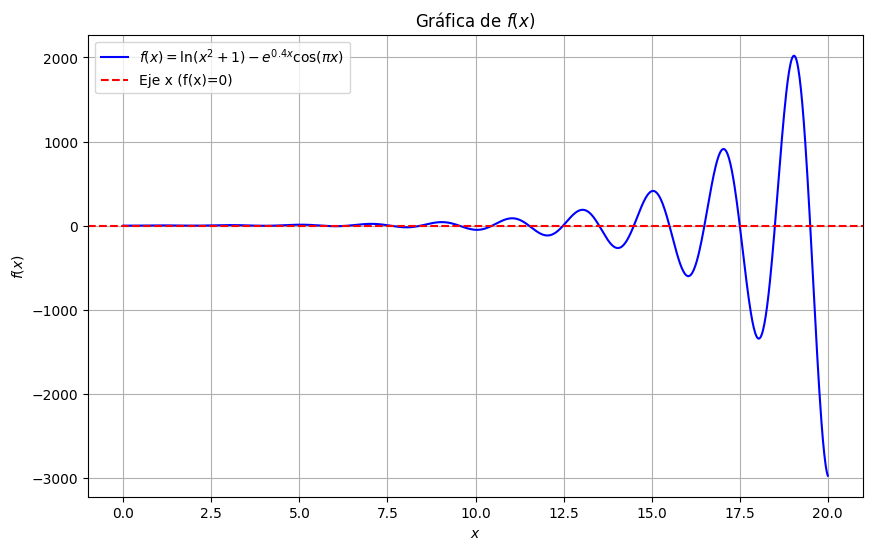

La aproximación inicial para el 3-ésimo cero positivo más pequeño es: 2.2322


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp, cos, pi

# Definimos la función f(x)
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

# Gráfica de la función
def graficar_funcion():
    x = np.linspace(0, 20, 1000)  # Valores de x desde 0 a 10 con alta resolución
    y = f(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$f(x) = \ln(x^2 + 1) - e^{0.4x}\cos(\pi x)$", color="blue")
    plt.axhline(0, color="red", linestyle="--", linewidth=1.5, label="Eje x (f(x)=0)")
    plt.title("Gráfica de $f(x)$")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.grid(True)
    plt.legend()
    plt.show()

# Función para aproximar el enésimo cero positivo más pequeño
def aproximacion_ceros(n):
    # Buscamos los valores de x donde f(x) cambia de signo
    x = np.linspace(0, 10, 1000)
    y = f(x)
    cambios_signo = []
    
    for i in range(1, len(x)):
        if y[i-1] * y[i] < 0:  # Cambio de signo
            cambios_signo.append(x[i-1])  # Guardamos la aproximación inicial
    
    if n <= len(cambios_signo):
        return f"La aproximación inicial para el {n}-ésimo cero positivo más pequeño es: {cambios_signo[n-1]:.4f}"
    else:
        return f"No se encontró el {n}-ésimo cero positivo más pequeño en el rango dado."

# Ejecutar las funciones
graficar_funcion()
n = 3  # Cambia este valor para buscar otro enésimo cero
resultado = aproximacion_ceros(n)
print(resultado)

d. Use la parte c) para determinar, dentro de $10^{-6}$, el vigesimoquinto cero positivo más pequeño de $f$.

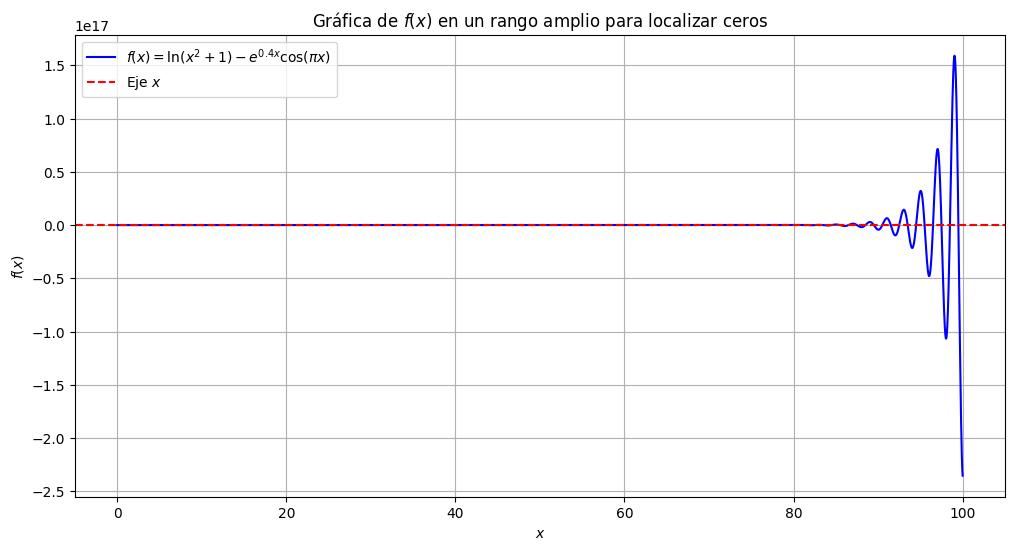

El vigesimoquinto cero positivo de la función es aproximadamente: 24.49988676018327993233


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp, cos, pi
# Definición de la función
def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)
# Graficar la función en un rango amplio
x = np.linspace(0, 100, 10000)  # Extender el intervalo para localizar el 25º cero
y = f(x)
plt.figure(figsize=(12, 6))
plt.plot(x, y, label=r"$f(x) = \ln(x^2 + 1) - e^{0.4x} \cos(\pi x)$", color='blue')
plt.axhline(0, color='red', linestyle='--', label="Eje $x$")
plt.title("Gráfica de $f(x)$ en un rango amplio para localizar ceros")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid()
plt.show()
# Localización de intervalos iniciales para los ceros
cero_indices = np.where(np.diff(np.sign(y)))[0]  # Indices donde f(x) cruza el eje
cero_aproximaciones = x[cero_indices]  # Valores aproximados de los ceros
# Seleccionar el 25º cero positivo
if len(cero_aproximaciones) >= 25:
    inicial_25 = (cero_aproximaciones[24] - 0.1, cero_aproximaciones[24] + 0.1)  # Intervalo ajustado alrededor del 25º cero
else:
    raise ValueError("No se encontraron suficientes ceros en el intervalo graficado.")
# Método de bisección para refinar el 25º cero
def biseccion(f, a, b, tolerancia=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("El intervalo no contiene un cambio de signo.")
    for _ in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tolerancia or abs(b - a) < tolerancia:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return None
# Refinar el 25º cero
cero_25 = biseccion(f, inicial_25[0], inicial_25[1])
print(f"El vigesimoquinto cero positivo de la función es aproximadamente: {cero_25:.20f}")

## Ejercicio 7
La función $f(x) = x^{1/3}$ tiene raíz en $x = 0$. Usando el punto de inicio $x = 1$ y
 $p_0 = 5$, $p_1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

In [37]:
import numpy as np
# Definición de la función y su derivada
def f(x):
    return x**(1/3)
def f_derivada(x):
    return (1 / 3) * x**(-2/3)
# Método de Newton
def metodo_newton(f, f_derivada, p0, tolerancia=1e-6, max_iter=100):
    iteraciones = 0
    for i in range(max_iter):
        p1 = p0 - f(p0) / f_derivada(p0)
        iteraciones += 1
        if abs(p1 - p0) < tolerancia:
            return p1, iteraciones
        p0 = p1
    return None, iteraciones  # No converge
# Método de la Secante
def metodo_secante(f, p0, p1, tolerancia=1e-6, max_iter=100):
    iteraciones = 0
    for i in range(max_iter):
        if f(p1) - f(p0) == 0:
            return None, iteraciones  # Evitar división por cero
        p2 = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        iteraciones += 1
        if abs(p2 - p1) < tolerancia:
            return p2, iteraciones
        p0, p1 = p1, p2
    return None, iteraciones  # No converge
# Parámetros iniciales
p0_newton = 1
p0_secante = 5
p1_secante = 0.5
tolerancia = 1e-6
# Resolver con el método de Newton
solucion_newton, iteraciones_newton = metodo_newton(f, f_derivada, p0_newton, tolerancia)
# Resolver con el método de la Secante
solucion_secante, iteraciones_secante = metodo_secante(f, p0_secante, p1_secante, tolerancia)
# Mostrar resultados
print("Resultados:")
print(f"Método de Newton: solución = {solucion_newton}, iteraciones = {iteraciones_newton}")
print(f"Método de la Secante: solución = {solucion_secante}, iteraciones = {iteraciones_secante}")

Resultados:
Método de Newton: solución = None, iteraciones = 100
Método de la Secante: solución = None, iteraciones = 100
